# Quantum Mentorship Program - Task 4 The NISQ Devices
## Extra investigation - Comparing depolarization to NISQ devices

In this extra I use the IBM Runtime services to compare the depolarization noise to the model of noise of an actual superconducitng quantum hardware, the Guadalupe system. 

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from Extra_Comparison_to_NISQ_functions import *
from Task4_functions import *

from qiskit_ibm_provider import IBMProvider
from qiskit.providers.fake_provider import FakeGuadalupe
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime import QiskitRuntimeService

token = '5b855c79416be01d9eec5c6eefffeb2fb890feffaf606ca2d116303a34d652f36d26621d378a79f6487e200e08acb3e360ac25efd407e78d465b67902668b89f'
provider = IBMProvider(token)

# Extra investigation - Number of qubits

In [2]:
seed = np.random.seed(1234)

n_qubits_list = [2,4,6,8,10,12]
states = create_random_quantum_state(n_qubits_list)

operations_list = create_operations_list(states, n_qubits_list)

fake_backend = FakeGuadalupe()
noisy_IBM_devices = create_device_list_IBM(n_qubits_list, provider, 2000, fake_backend)

devices = create_device_list(n_qubits_list, shots=2000)

noisy_IBM_circuits = create_circuit_list_IBM(devices, n_qubits_list)
circuits = create_circuit_list(devices, n_qubits_list)

In [3]:
res = probs_results(noisy_IBM_circuits, n_qubits_list, operations_list)

p_values = np.linspace(0, 0, 1)
zeros_noise_results = density_matrix_results(circuits, n_qubits_list, operations_list, p_values)

#Calculate the density matrices of the SWAP circuit with noise
p_values = np.linspace(0.0001, 0.01, 5)
noisy_results = density_matrix_results(circuits, n_qubits_list, operations_list, p_values)

fidelties_IBM = calc_fidelity_IBM(zeros_noise_results, res, n_qubits_list)
fidelties = calc_fidelity(zeros_noise_results, noisy_results, n_qubits_list, p_values)

/home/ubuntu/.local/lib/python3.10/site-packages/autograd/numpy/numpy_wrapper.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return _np.array(args, *array_args, **array_kwargs)
/home/ubuntu/.local/lib/python3.10/site-packages/pennylane/_qubit_device.py:1022: UserWarning: Requested state or density matrix with finite shots; the returned state information is analytic and is unaffected by sampling. To silence this warning, set shots=None on the device.
  warnings.warn(


Text(0, 0.5, 'Fidelity')

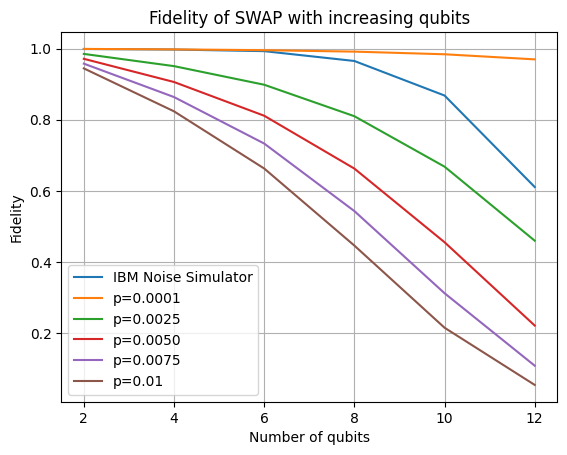

In [4]:
plt.plot(n_qubits_list, fidelties_IBM, label = 'IBM Noise Simulator')
for i in range(len(p_values)):
    label = f'p={p_values[i]}'[0:8]
    plt.plot(n_qubits_list, fidelties[:][i], label=label)
plt.legend()
plt.title('Fidelity of SWAP with increasing qubits')
plt.grid()
plt.xlabel('Number of qubits')
plt.ylabel('Fidelity')